# Setup

In [196]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
training = pd.read_csv('./playground-series-s5e11/train.csv', index_col='id')
testing = pd.read_csv('./playground-series-s5e11/test.csv', index_col='id')
submission = pd.read_csv('./playground-series-s5e11/sample_submission.csv')

training.head(5)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [198]:
training.shape

(593994, 12)

# EDA

In [199]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994,593994,593994,593994,593994,593994,593994.000000
unique,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,306175,288843,279606,450645,324695,58695,NaN
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,NaN,NaN,NaN,NaN,NaN,NaN,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,NaN,NaN,NaN,NaN,NaN,NaN,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [200]:
training.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


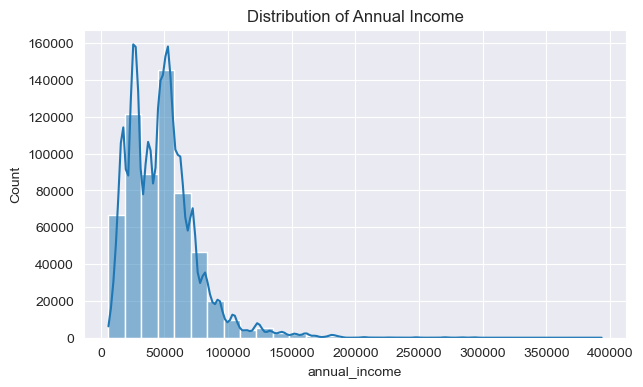

In [201]:
plt.figure(figsize=(7,4))
sns.histplot(training["annual_income"], kde=True, bins=30)
plt.title("Distribution of Annual Income")
plt.show()

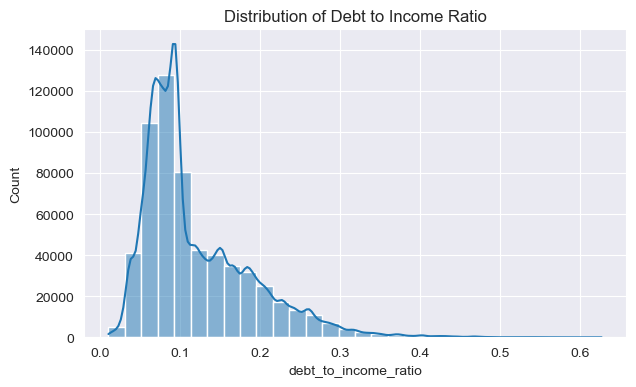

In [202]:
plt.figure(figsize=(7,4))
sns.histplot(training["debt_to_income_ratio"], kde=True, bins=30)
plt.title("Distribution of Debt to Income Ratio")
plt.show()

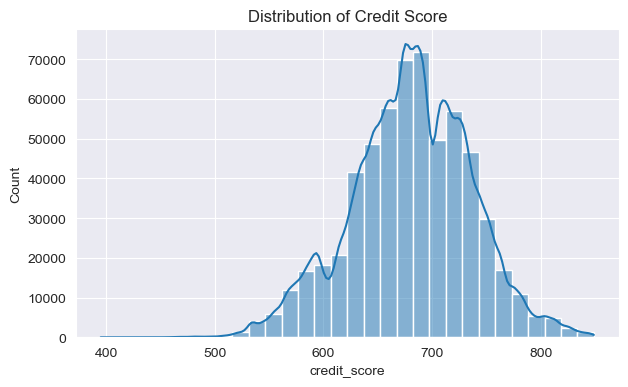

In [203]:
plt.figure(figsize=(7,4))
sns.histplot(training["credit_score"], kde=True, bins=30)
plt.title("Distribution of Credit Score")
plt.show()

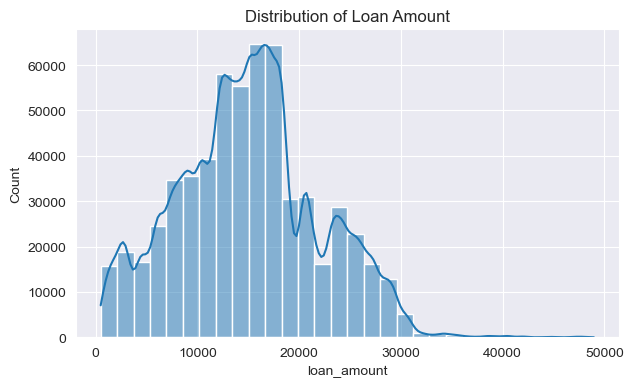

In [204]:
plt.figure(figsize=(7,4))
sns.histplot(training["loan_amount"], kde=True, bins=30)
plt.title("Distribution of Loan Amount")
plt.show()

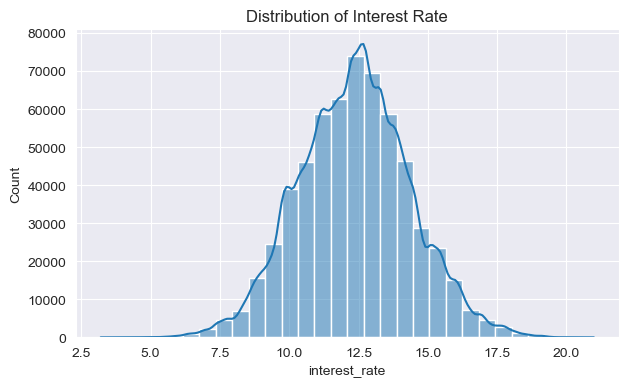

In [205]:
plt.figure(figsize=(7,4))
sns.histplot(training["interest_rate"], kde=True, bins=30)
plt.title("Distribution of Interest Rate")
plt.show()

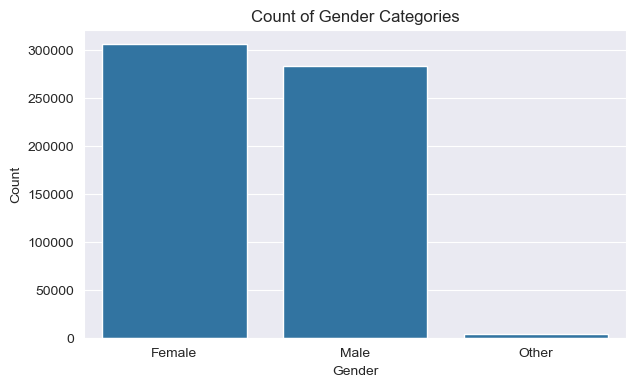

In [206]:
plt.figure(figsize=(7,4))
sns.countplot(x="gender", data=training)
plt.title("Count of Gender Categories")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

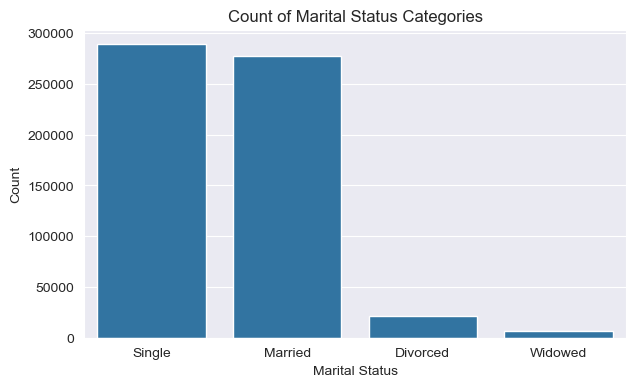

In [207]:
plt.figure(figsize=(7,4))
sns.countplot(x="marital_status", data=training)
plt.title("Count of Marital Status Categories")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

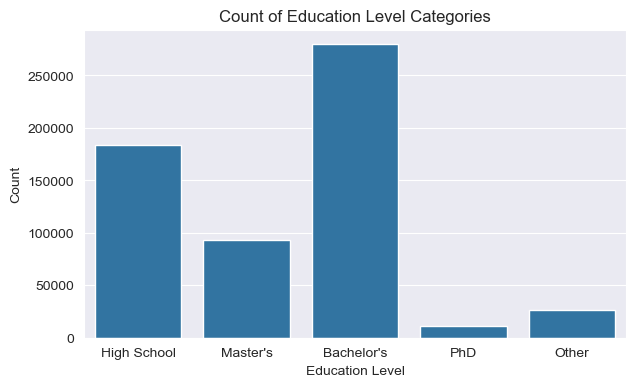

In [208]:
plt.figure(figsize=(7,4))
sns.countplot(x="education_level", data=training)
plt.title("Count of Education Level Categories")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

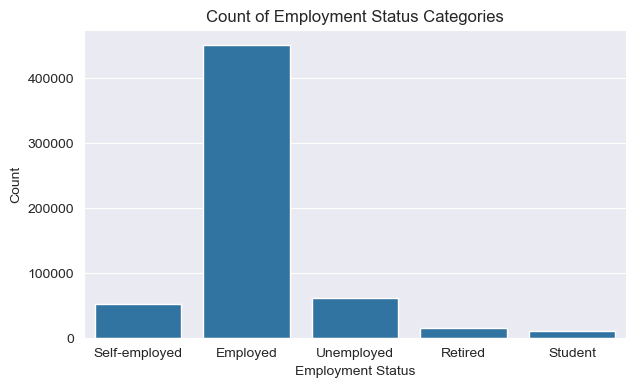

In [209]:
plt.figure(figsize=(7,4))
sns.countplot(x="employment_status", data=training)
plt.title("Count of Employment Status Categories")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

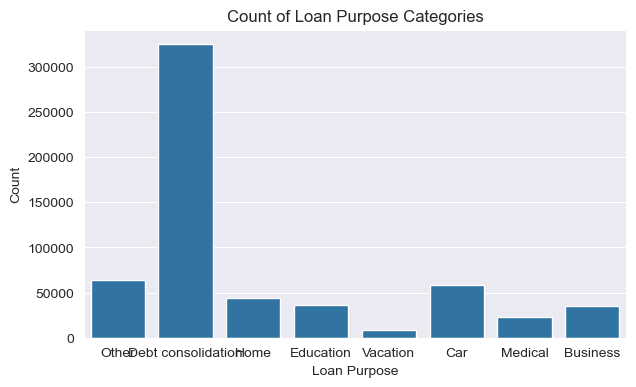

In [210]:
plt.figure(figsize=(7,4))
sns.countplot(x="loan_purpose", data=training)
plt.title("Count of Loan Purpose Categories")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.show()

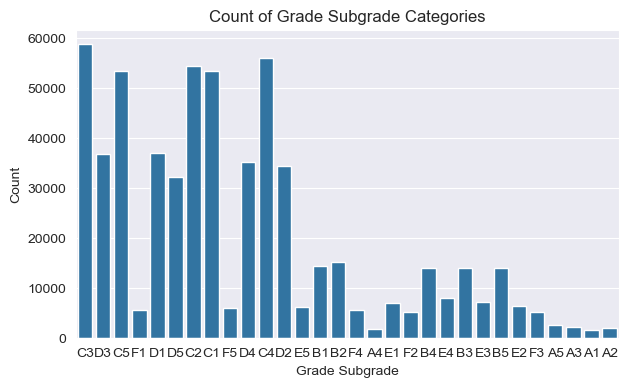

In [211]:
plt.figure(figsize=(7,4))
sns.countplot(x="grade_subgrade", data=training)
plt.title("Count of Grade Subgrade Categories")
plt.xlabel("Grade Subgrade")
plt.ylabel("Count")
plt.show()

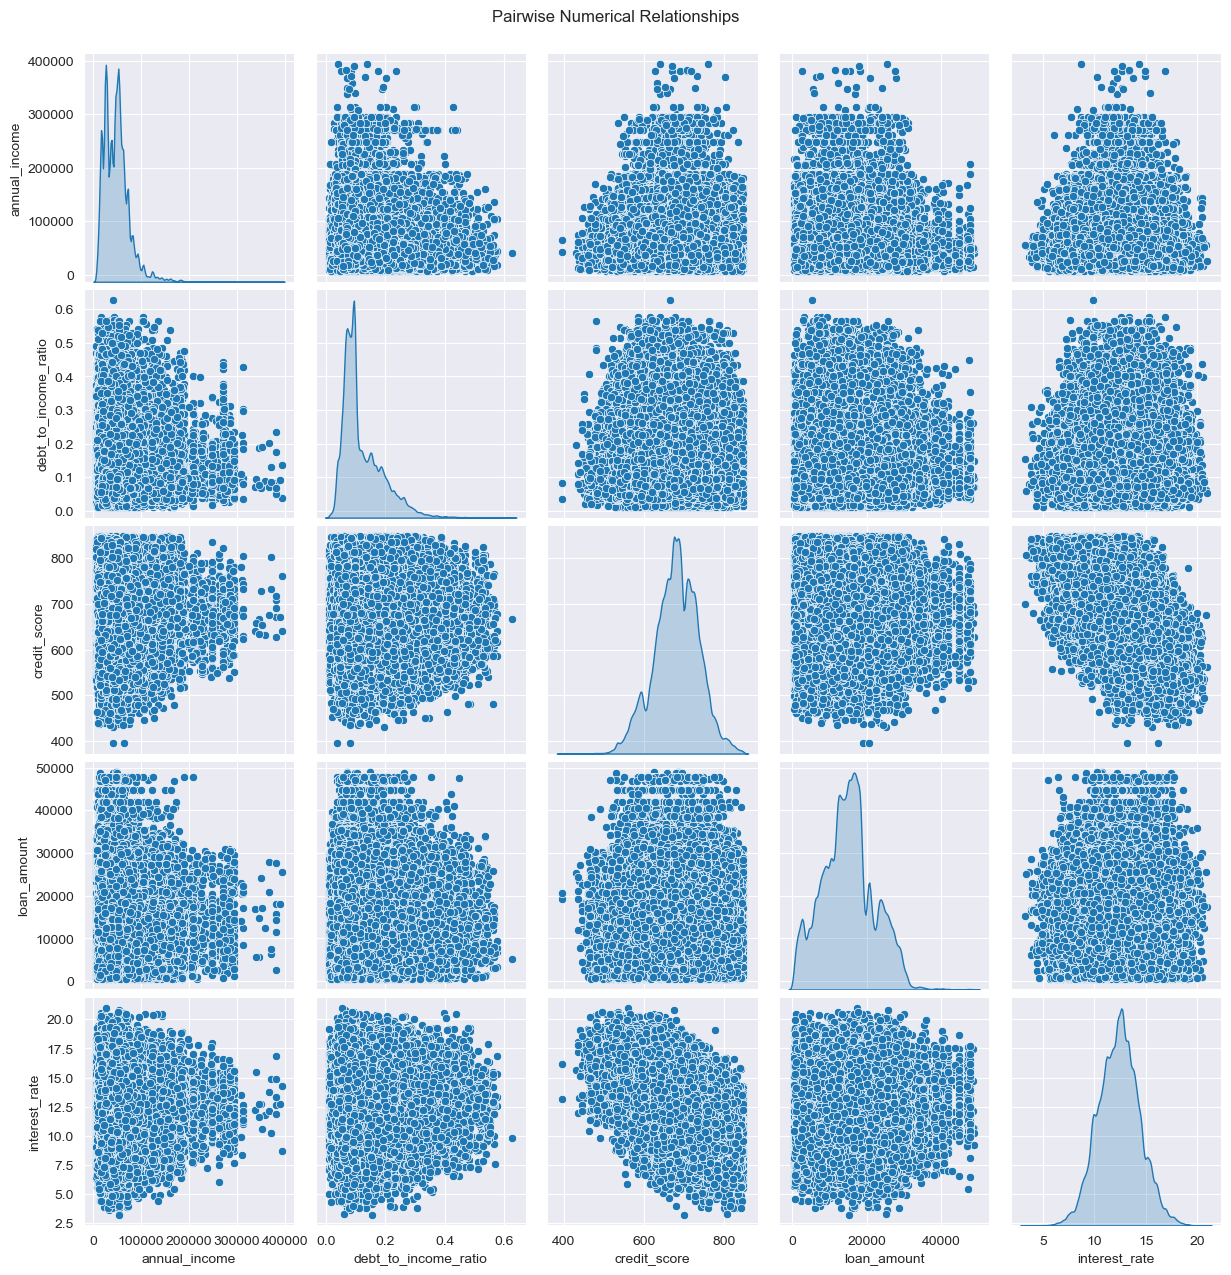

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
annual_income,1.000000,0.000553,0.001509,-0.003407,-0.002507
debt_to_income_ratio,0.000553,1.000000,-0.061617,-0.008236,0.030316
credit_score,0.001509,-0.061617,1.000000,-0.005761,-0.538335
loan_amount,-0.003407,-0.008236,-0.005761,1.000000,-0.001174
interest_rate,-0.002507,0.030316,-0.538335,-0.001174,1.000000


In [212]:
numerical_vars = ["annual_income","debt_to_income_ratio","credit_score", "loan_amount", "interest_rate"]
sns.pairplot(training[numerical_vars], diag_kind="kde")
plt.suptitle("Pairwise Numerical Relationships", y=1.02)
plt.show()

training[numerical_vars].corr()

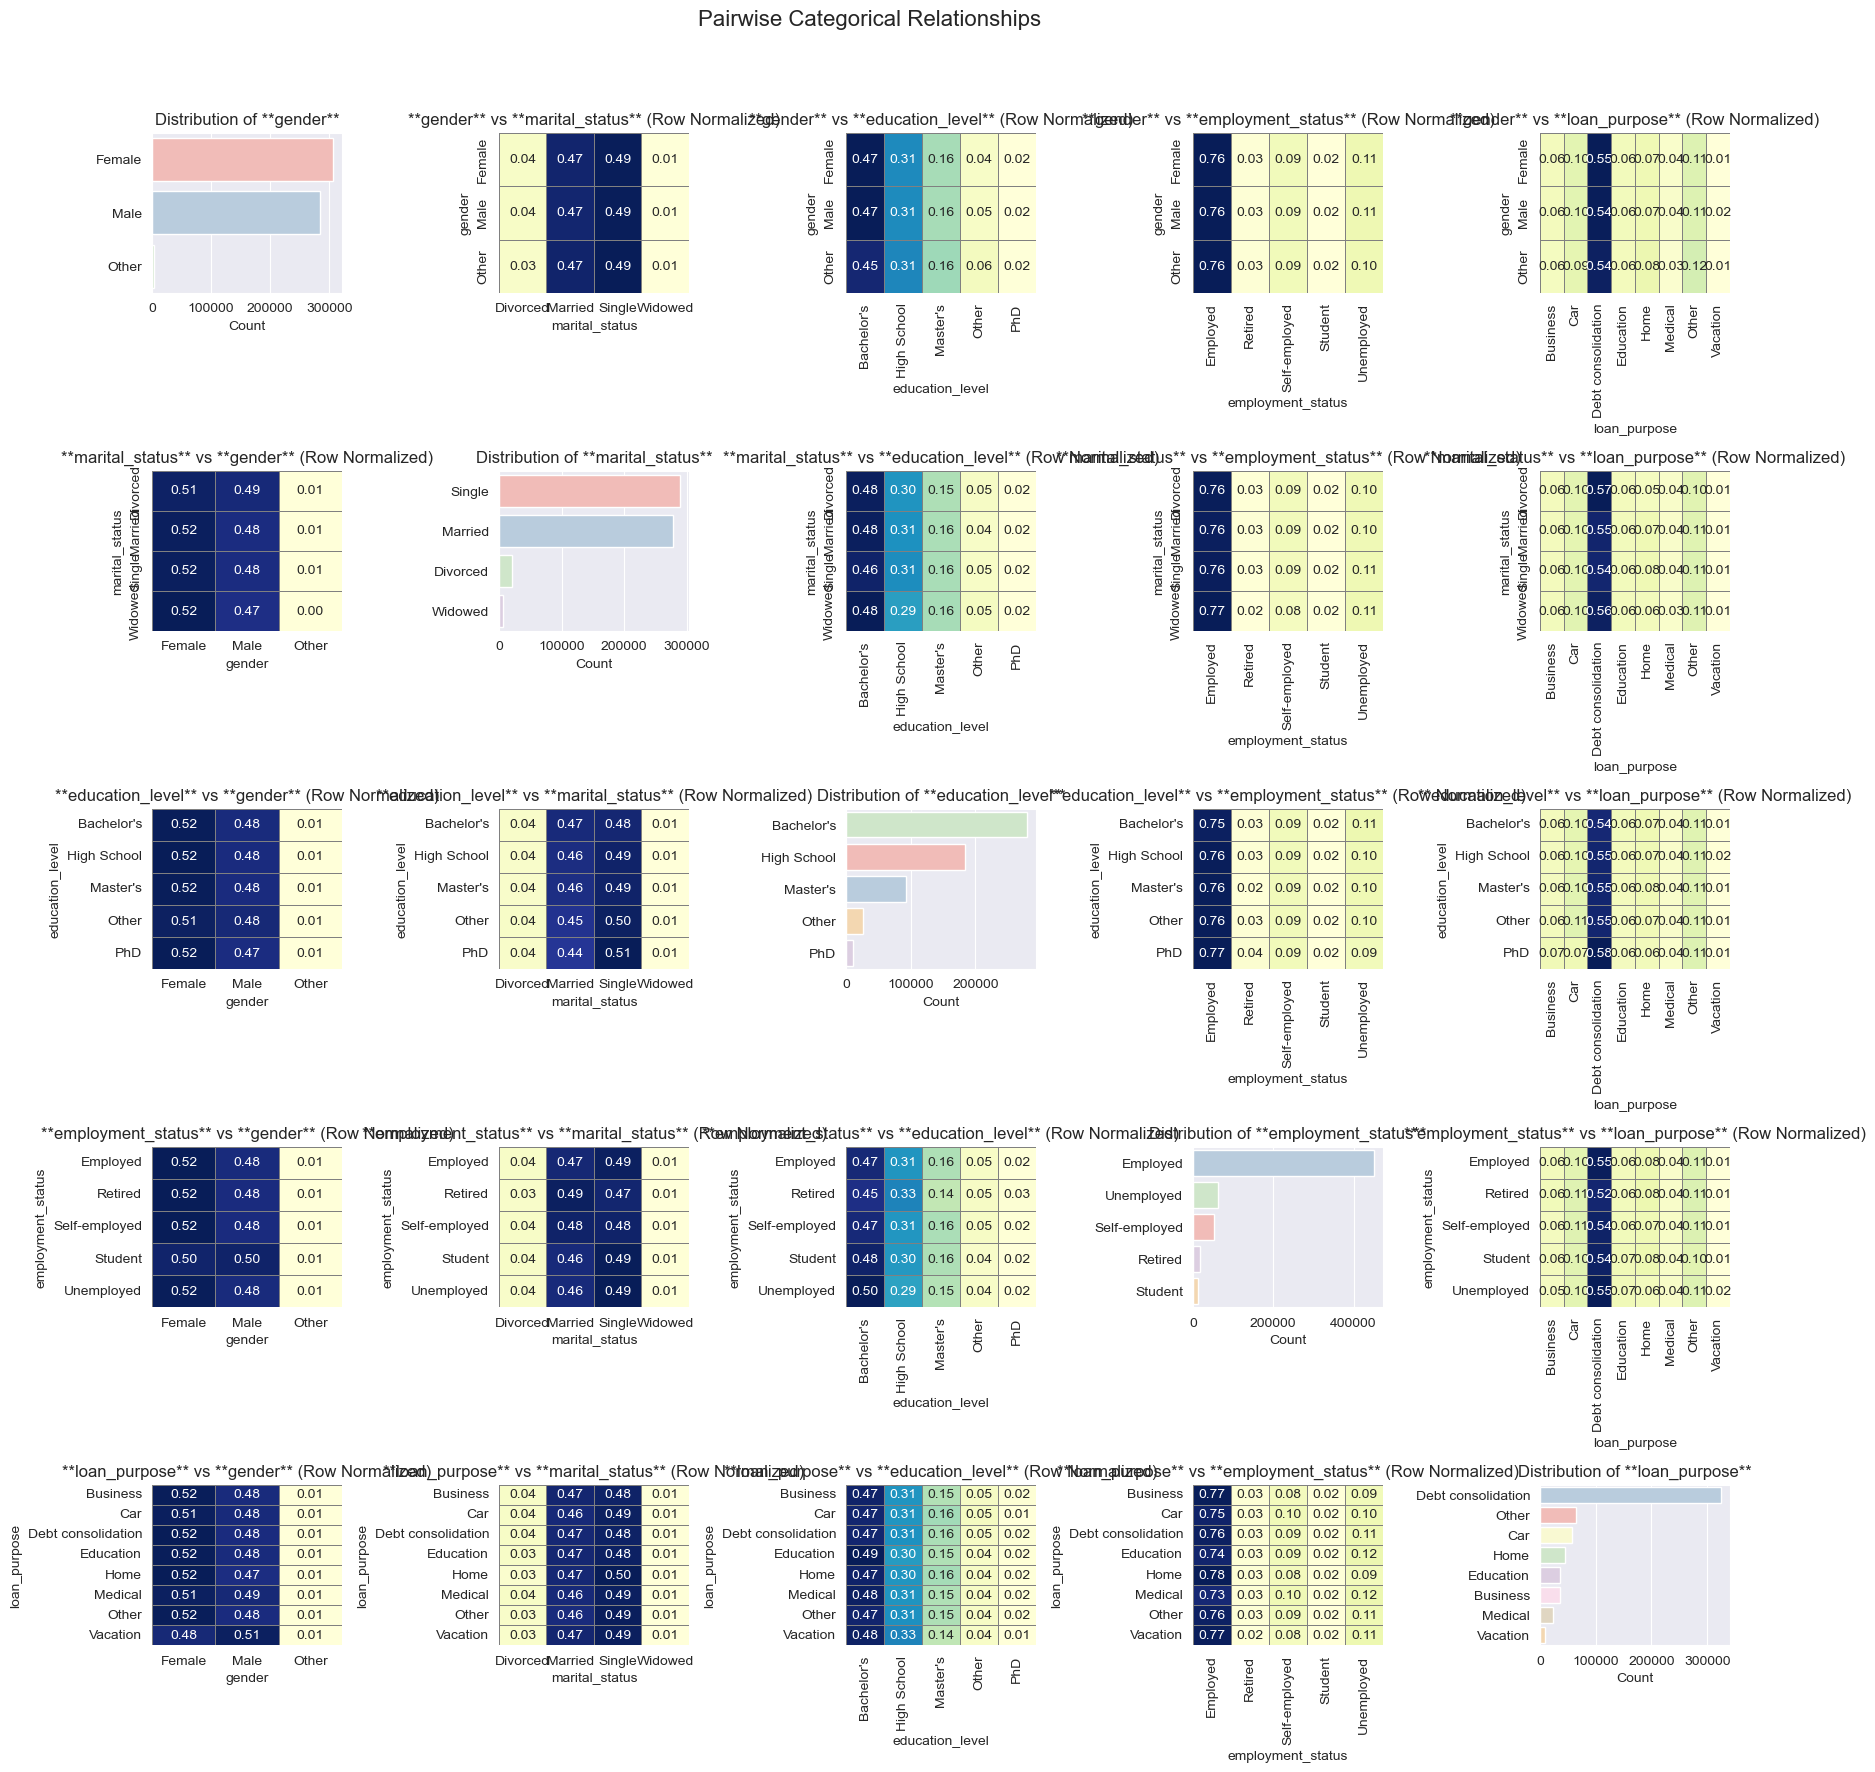

In [213]:
categorical_vars = ["gender","marital_status","education_level", "employment_status", "loan_purpose"]
n_categorical_vars = len(categorical_vars)

fig, axes = plt.subplots(n_categorical_vars, n_categorical_vars, figsize=(n_categorical_vars * 3.5, n_categorical_vars * 3.5))
plt.suptitle("Pairwise Categorical Relationships", y=1.01, fontsize=16)

for i in range(n_categorical_vars):
    for j in range(n_categorical_vars):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # --- Diagonal (i == j): Individual Distribution (Count Plot) ---
        if i == j:
            # Use countplot to show the frequency of each category
            sns.countplot(
                y=training[var1],
                ax=axes[i, j],
                hue=training[var1],
                palette="Pastel1",
                order=training[var1].value_counts().index,
                legend=False
            )
            axes[i, j].set_title(f"Distribution of **{var1}**", fontsize=12)
            axes[i, j].set_ylabel("")
            axes[i, j].set_xlabel("Count")

        # --- Off-Diagonal (i != j): Pairwise Relationship (Heatmap) ---
        else:
            # 1. Create a contingency table (cross-tabulation)
            # Normalize='index' (row-wise) shows the distribution of var2 *within* each category of var1
            contingency_table = pd.crosstab(training[var1], training[var2], normalize='index')

            # 2. Plot the contingency table as a heatmap
            sns.heatmap(
                contingency_table,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                cbar=False,
                ax=axes[i, j],
                linewidths=.5,
                linecolor='gray'
            )
            axes[i, j].set_title(f"**{var1}** vs **{var2}** (Row Normalized)", fontsize=12)
            axes[i, j].set_ylabel(var1)
            axes[i, j].set_xlabel(var2)

# Improve layout spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [214]:
from sklearn.model_selection import train_test_split

full_categorical_vars = categorical_vars + ["grade_subgrade"]

full_vars = numerical_vars + full_categorical_vars

X = training[full_vars]
y = training["loan_paid_back"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_train.shape, X_test.shape

((415795, 11), (178199, 11))

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[numerical_vars])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=numerical_vars,
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[numerical_vars])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=numerical_vars,
    index=X_test.index
)

In [216]:
X_train_cat = pd.get_dummies(X_train[categorical_vars], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_vars], drop_first=True)

X_train_encoded_cat, X_test_encoded_cat = X_train_cat.align(
    X_test_cat,
    join='left',
    axis=1,
    fill_value=0
)

print(X_train_cat.shape, X_test_cat.shape)

X_train_cat = pd.concat([X_train_scaled_df, X_train_encoded_cat], axis=1)
X_test_cat = pd.concat([X_test_scaled_df, X_test_encoded_cat], axis=1)

(415795, 20) (178199, 20)


In [217]:
X_train_full = pd.get_dummies(X_train[full_categorical_vars], drop_first=True)
X_test_full = pd.get_dummies(X_test[full_categorical_vars], drop_first=True)

X_train_encoded_cat_full, X_test_encoded_cat_full = X_train_full.align(
    X_test_full,
    join='left',
    axis=1,
    fill_value=0
)

print(X_train_full.shape, X_test_full.shape)

X_train_full = pd.concat([X_train_scaled_df, X_train_encoded_cat_full], axis=1)
X_test_full = pd.concat([X_test_scaled_df, X_test_encoded_cat_full], axis=1)

(415795, 49) (178199, 49)


In [218]:
X_train_full.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_High School,education_level_Master's,education_level_Other,education_level_PhD,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,grade_subgrade_A2,grade_subgrade_A3,grade_subgrade_A4,grade_subgrade_A5,grade_subgrade_B1,grade_subgrade_B2,grade_subgrade_B3,grade_subgrade_B4,grade_subgrade_B5,grade_subgrade_C1,grade_subgrade_C2,grade_subgrade_C3,grade_subgrade_C4,grade_subgrade_C5,grade_subgrade_D1,grade_subgrade_D2,grade_subgrade_D3,grade_subgrade_D4,grade_subgrade_D5,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29245,-0.062662,1.098380,-0.791157,0.391826,0.937665,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
272587,-0.440336,-0.418219,0.398791,-1.771517,0.310361,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
464723,0.397007,-0.636959,-0.394507,-1.116272,-0.974118,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
135096,0.035203,-0.622376,1.047853,1.217934,-0.705274,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39097,0.234104,-0.403636,0.182437,-0.958745,-1.471978,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Evaluation Function

In [219]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    ap_score = average_precision_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {ap_score:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": acc,
        "auc": roc_auc,
        "average_precision": ap_score
    }

# Logistic Regression Model

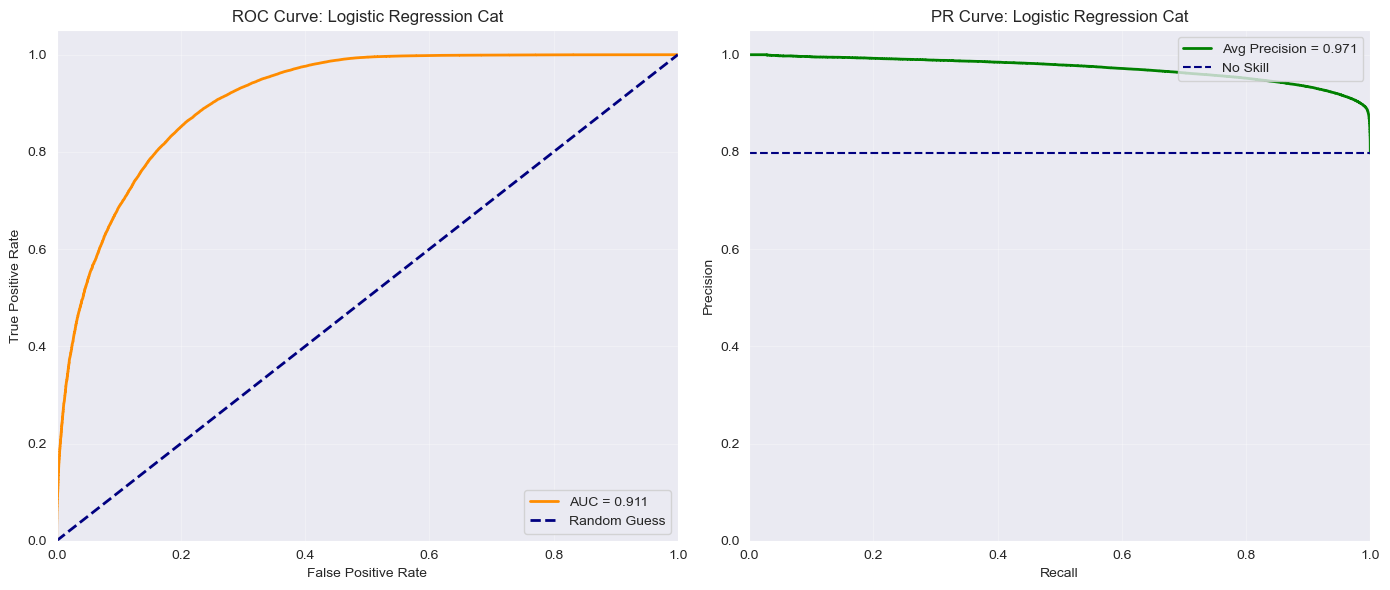

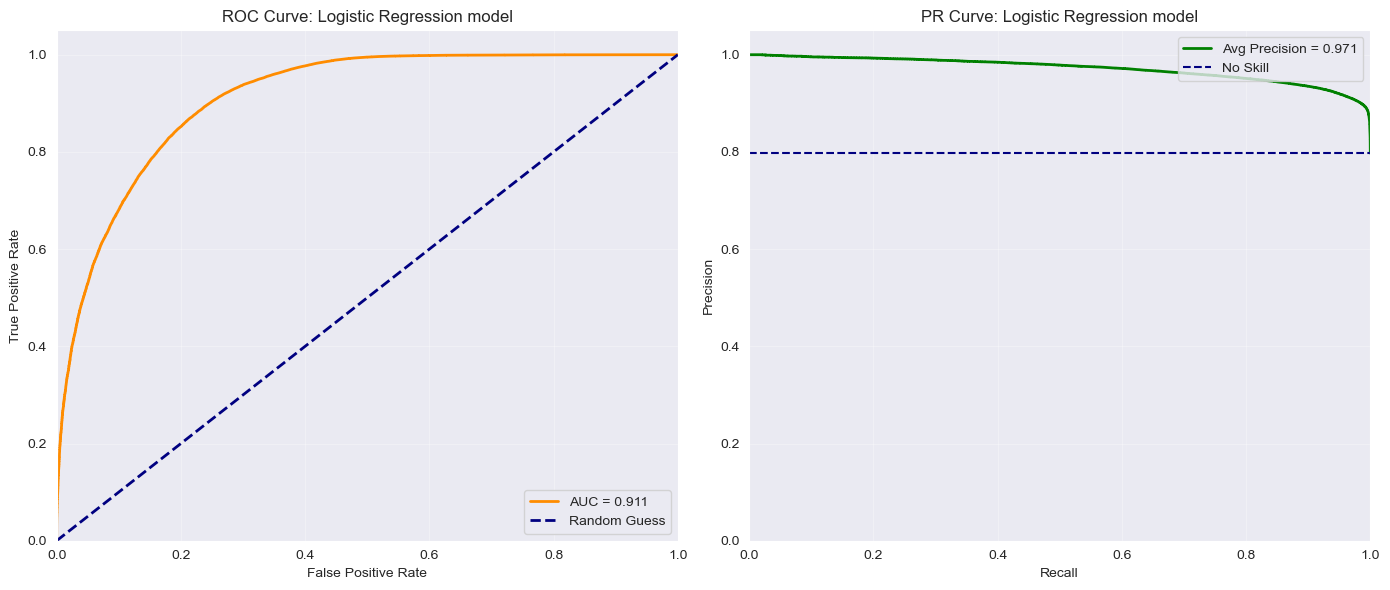

In [220]:
from sklearn.linear_model import LogisticRegression

results = []

lr_cat = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr_cat, X_train_cat, y_train, X_test_cat, y_test, "Logistic Regression Cat", True)
)

lr_full = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr_full, X_train_full, y_train, X_test_full, y_test, "Logistic Regression model", True)
)

# Gradient Boosting Classifier Model

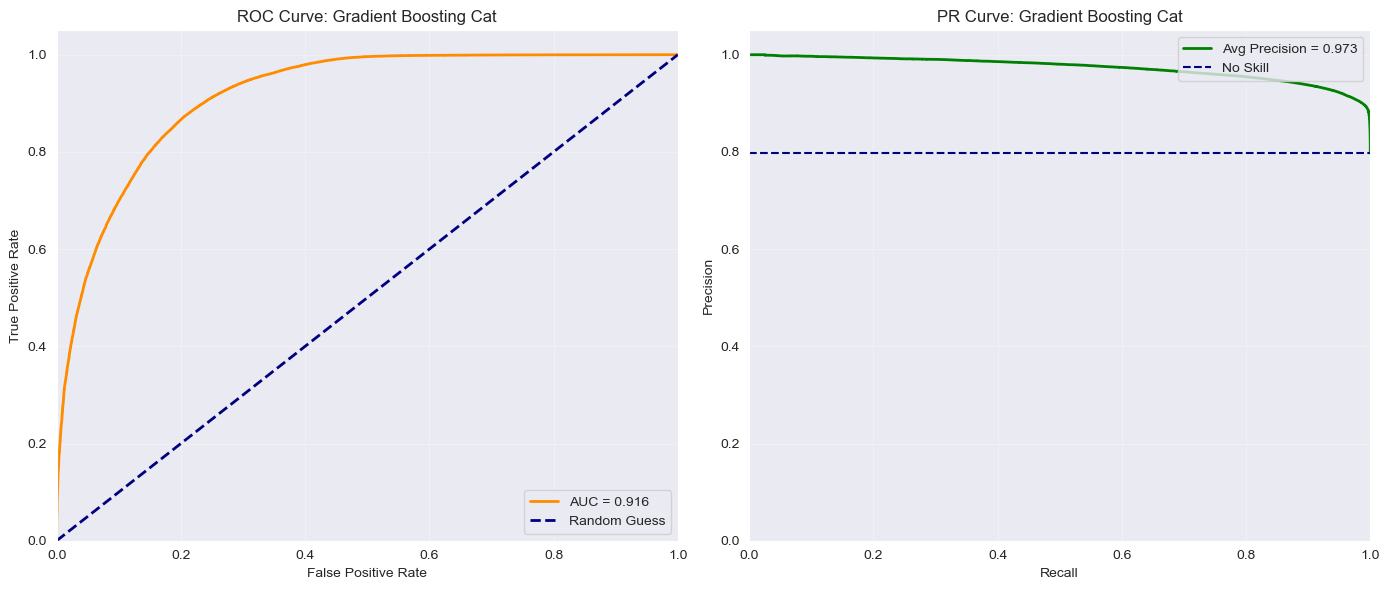

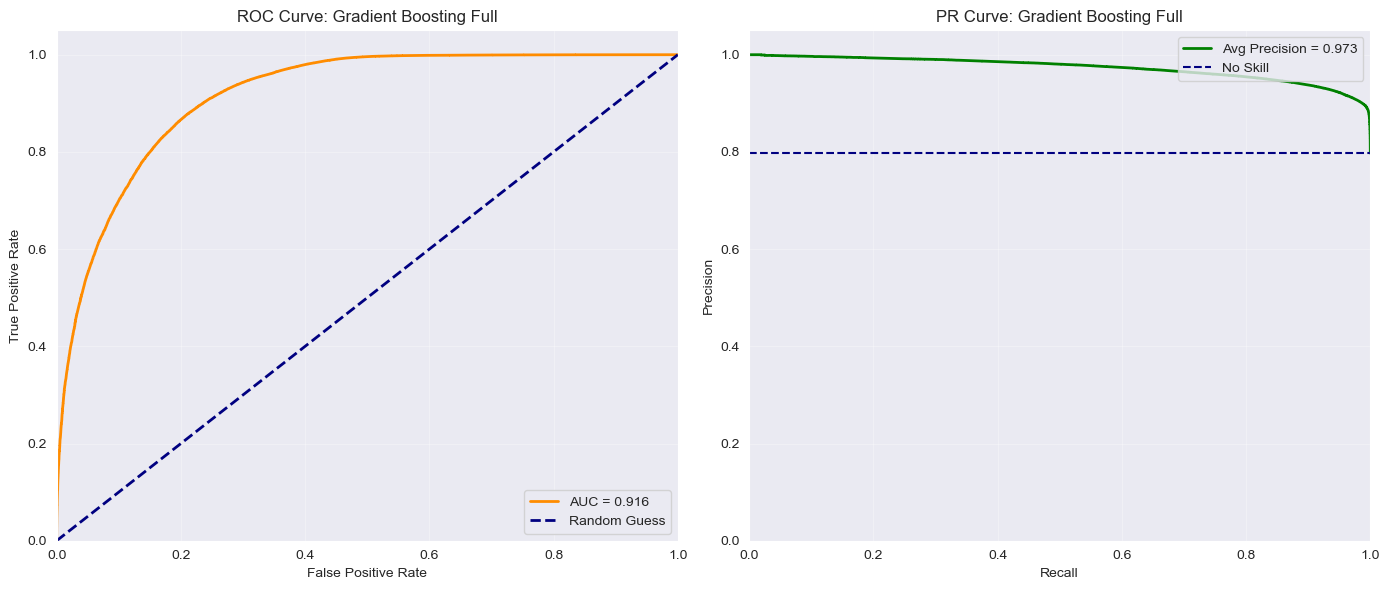

,model,accuracy,auc,average_precision
0,Logistic Regression Cat,0.899691,0.911133,0.971120
1,Logistic Regression model,0.900594,0.911291,0.971115
2,Gradient Boosting Cat,0.902828,0.916155,0.972844
3,Gradient Boosting Full,0.902805,0.916160,0.972833


In [221]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cat = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
results.append(
    evaluate_and_graph(gb_cat, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting Cat", True)
)

gb_full = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
results.append(
    evaluate_and_graph(gb_full, X_train_full, y_train, X_test_full, y_test, "Gradient Boosting Full", True)
)

pd.DataFrame(results)

# Results

In [222]:
df = pd.DataFrame(results)

df_sorted_acc = df.sort_values(by="accuracy", ascending=False)
df_sorted_auc = df.sort_values(by="auc", ascending=False)
df_sorted_ap = df.sort_values(by="average_precision", ascending=False)

print("Best by Accuracy:")
display(df_sorted_acc.head(1))

print("Best by AUC:")
display(df_sorted_auc.head(1))

print("Best by Average Precision:")
display(df_sorted_ap.head(1))

df_ranked = df.copy()
df_ranked["rank_acc"] = df["accuracy"].rank(ascending=False)
df_ranked["rank_auc"] = df["auc"].rank(ascending=False)
df_ranked["rank_ap"] = df["average_precision"].rank(ascending=False)

df_ranked.sort_values(by=["rank_acc", "rank_auc", "rank_ap"], inplace=True)
df_ranked

df["score_sum"] = (
    df["accuracy"] / df["accuracy"].max() +
    df["auc"] / df["auc"].max() +
    df["average_precision"] / df["average_precision"].max()
)

df.sort_values(by="score_sum", ascending=False)

Best by Accuracy:


,model,accuracy,auc,average_precision
2,Gradient Boosting Cat,0.902828,0.916155,0.972844


Best by AUC:


,model,accuracy,auc,average_precision
3,Gradient Boosting Full,0.902805,0.91616,0.972833


Best by Average Precision:


,model,accuracy,auc,average_precision
2,Gradient Boosting Cat,0.902828,0.916155,0.972844


,model,accuracy,auc,average_precision,score_sum
2,Gradient Boosting Cat,0.902828,0.916155,0.972844,2.999995
3,Gradient Boosting Full,0.902805,0.916160,0.972833,2.999964
1,Logistic Regression model,0.900594,0.911291,0.971115,2.990434
0,Logistic Regression Cat,0.899691,0.911133,0.971120,2.989267


This shows me that the LR was very close to the Gradient Boosting, within almost +-.01 for all the metrics (accuracy, auc, average_precision). So technically the best model was the GradientAcross all evaluation metrics—accuracy, ROC AUC, and average precision—the Gradient Boosting Cat model consistently ranked first, but only by a very small margin (≈0.001–0.01). The logistic regression models performed nearly identically, suggesting that the decision boundary is relatively linear and that additional model complexity provides diminishing returns. The fact that the Gradient Boosting Cat model achieves the top scores without using the `grade_subgrade` feature further implies that this variable adds limited predictive value. Boosting Cat model which notably leaves out the grade_subgrade variable.

# Submission for Kaggle

In [223]:
testing_scaled_num = scaler.transform(testing[numerical_vars])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=numerical_vars,
    index=testing.index
)

testing_cat_dummies = pd.get_dummies(testing[categorical_vars], drop_first=True)

_, testing_encoded_aligned = X_train_encoded_cat.align(
    testing_cat_dummies,
    join='left',
    axis=1,
    fill_value=0
)

testing_cat_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {X_train_cat.shape}")
print(f"Testing shape:  {testing_cat_final.shape}")

Training shape: (415795, 25)
Testing shape:  (254569, 25)


In [224]:
predictions = gb_cat.predict_proba(testing_cat_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'loan_paid_back': predictions
})

# 7. Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


,id,loan_paid_back
0,593994,0.920847
1,593995,0.978571
2,593996,0.407667
3,593997,0.937855
4,593998,0.949666
